# **Determinação da idade de estrelas com Machine Learning**


## Objetivo

- Neste projeto objetivamos a determinação da idade de estrelas a partir de diferentes propriedados físicas. Os dados utlizados nesse projeto são públicos e fornecidos pelo serviço de catálogo astronômico Vizier.
- Esse projeto é exercício prático de Machine Learning replicado do projeto original do profº Danilo Morales Teixeira.
- Os dados podem ser obtidos pelo link: https://vizier.u-strasbg.fr/viz-bin/VizieR-2


## Etapa 01 - Importação e verificação dos dados

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importação da base de dados
dados = pd.read_csv('https://raw.githubusercontent.com/danmorales/CursoDS_ProfDanilo/master/Astronomia/VizieR/VizieR.tsv', sep = ';')

In [3]:
# Visualizar os 5 primeiros registros
dados.head()

,B-V,Vmag,log.Teff,logL,Age,Mass
0,0.45,7.32,3.808,3.42,2.48e+07,7.67
1,0.45,7.32,3.808,3.42,3.82e+07,6.75
2,0.45,7.32,3.808,3.42,4.59e+07,6.47
3,0.71,7.38,3.767,3.39,2.47e+07,7.69
4,0.71,7.38,3.767,3.39,3.76e+07,6.77


**Dicionário da base de dados**
- B-V : Índice B-V
- Vmag: Magnitude na banda V
- log.Teff: Log da Temperatura efetiva
- logL: Log da Luminosidade
- Age: Idade da estrela
- Mass: Massa da estrela

In [4]:
# Informações da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   B-V       9879 non-null   float64
 1   Vmag      9879 non-null   float64
 2   log.Teff  9879 non-null   float64
 3   logL      9879 non-null   float64
 4   Age       9879 non-null   object 
 5   Mass      9670 non-null   float64
dtypes: float64(5), object(1)
memory usage: 463.2+ KB


Temos então, uma base de dados composta por 6 colunas e 9879 registros.

## Etapa 02 - Tratamento dos dados

Aqui podemos constatar que a coluna Age possui dados faltantes. Também vale ressaltar que a coluna Age encontra como uma variavél categórica (object), sendo necessária a conversão para númerica (int).

In [5]:
# Conversão da coluna Age para uma variável numérica
dados['Age'] = pd.to_numeric(dados['Age'], errors = 'coerce')

O atributo errors = 'coerce' força a conversão de todos os registros da coluna para númerico, quando isso não é possível, o registro é preenchido com NaN (Not a Number).

In [6]:
# Dividindo a coluna Age pela escala de bilhão
dados['Age'] = dados['Age'].apply(lambda x:x/1e9)

In [7]:
# Valor mínimo na coluna Age    
dados['Age'].min()

-296.0

In [8]:
# Valor máximo na coluna Age
dados['Age'].max()

1540000.0

Como é sabido, o Universo tem sua idade avaliada de 13,5 bilhões de anos, por isso, utilizaremos apenas idades de estrelas entre 0 e 13,5 bilhões.

In [9]:
# Condição para selecionar o intervalo de 0 a 13,5 bilhões na coluna Age
dados = dados[(dados['Age'] > 0) & (dados['Age'] < 13.5)]

In [10]:
# Verificar se há dados faltantes
dados.isna().sum()

B-V         0
Vmag        0
log.Teff    0
logL        0
Age         0
Mass        0
dtype: int64

## Etapa 03 - Visualização de dados

**Diagrama HR** -  A relação entre luminosidade e temperatura superficial das estrelas.

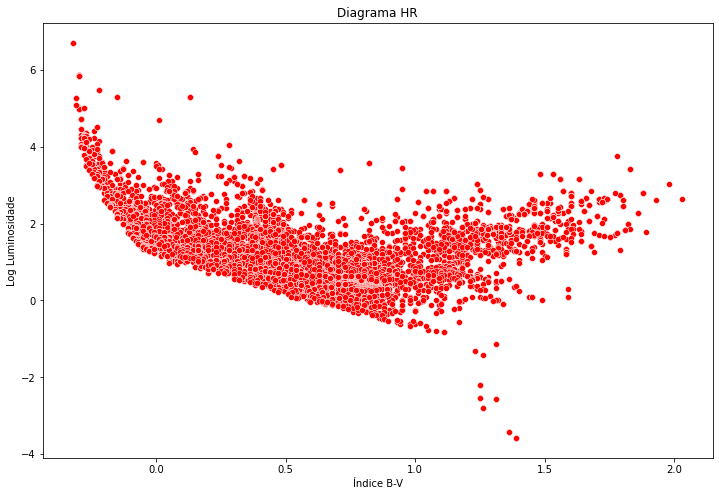

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'B-V', y = 'logL', data = dados, color = 'r')
plt.xlabel('Índice B-V')
plt.ylabel('Log Luminosidade')
plt.title('Diagrama HR')
plt.show()

Vamos agora, verificar a correlação entre as variáveis:

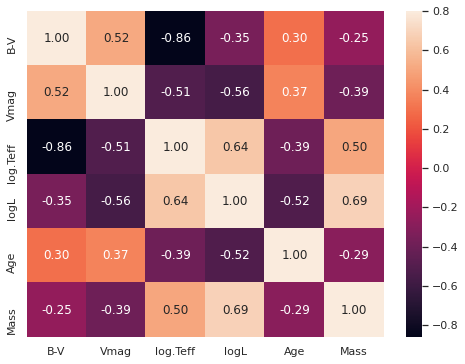

In [12]:
corr =dados.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, vmax = .8,annot_kws={'size': 12}, annot = True, fmt = '.2f')
plt.show()

Percebe-se uma correlação negativa entre o Índice B-V e o log da Temperatura Efetiva, as demais variáveis não possuem uma correlação expressiva.

Vamos verificar agora as distribuições das variáveis:

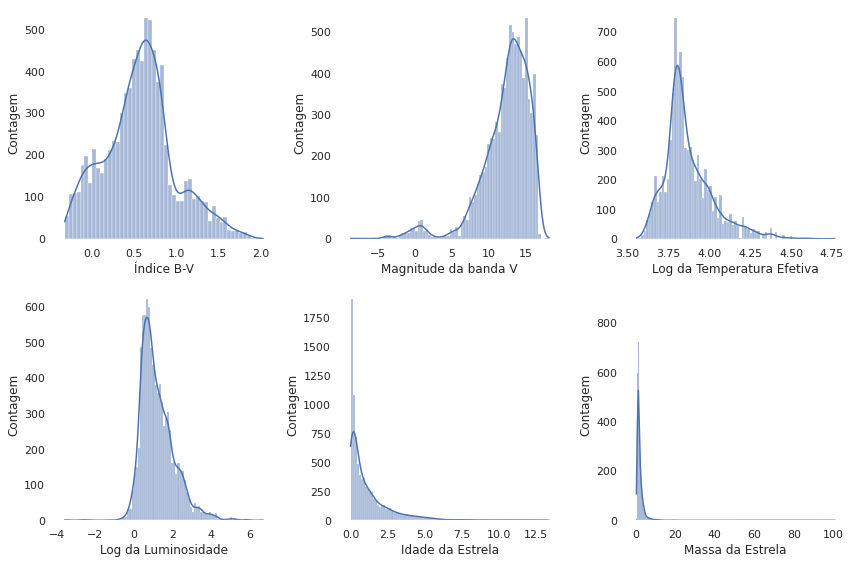

In [13]:
fig, ax = plt.subplots(2,3, figsize = (12,8))

sns.histplot(x = dados['B-V'], kde = True, ax = ax[0][0])
ax[0][0].set_xlabel('Índice B-V')
ax[0][0].set_ylabel('Contagem')

sns.histplot(x = dados['Vmag'], kde = True, ax = ax[0][1])
ax[0][1].set_xlabel('Magnitude da banda V')
ax[0][1].set_ylabel('Contagem')

sns.histplot(x = dados['log.Teff'], kde = True, ax = ax[0][2])
ax[0][2].set_xlabel('Log da Temperatura Efetiva')
ax[0][2].set_ylabel('Contagem')

sns.histplot(x = dados['logL'], kde = True, ax = ax[1][0])
ax[1][0].set_xlabel('Log da Luminosidade')
ax[1][0].set_ylabel('Contagem')

sns.histplot(x = dados['Age'], kde = True, ax = ax[1][1])
ax[1][1].set_xlabel('Idade da Estrela')
ax[1][1].set_ylabel('Contagem')

sns.histplot(x = dados['Mass'], kde = True, ax = ax[1][2])
ax[1][2].set_xlabel('Massa da Estrela')
ax[1][2].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

Plotamos a seguir boxplots para analisar se há a presença de outliers em nossos dados:

In [14]:
dados.head()

,B-V,Vmag,log.Teff,logL,Age,Mass
0,0.45,7.32,3.808,3.42,0.0248,7.67
1,0.45,7.32,3.808,3.42,0.0382,6.75
2,0.45,7.32,3.808,3.42,0.0459,6.47
3,0.71,7.38,3.767,3.39,0.0247,7.69
4,0.71,7.38,3.767,3.39,0.0376,6.77


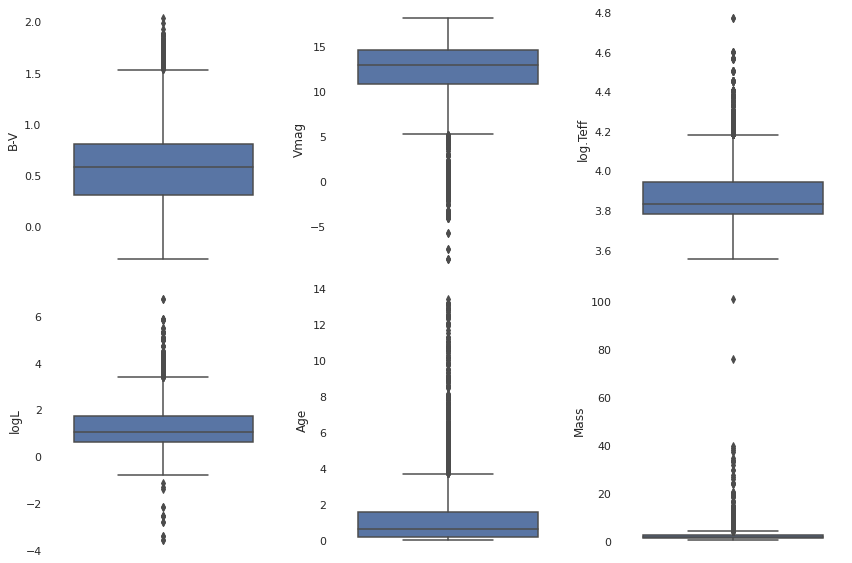

In [15]:
fig, ax = plt.subplots(2,3, figsize = (12,8))

sns.boxplot(y = 'B-V', data = dados, ax = ax[0][0])
sns.boxplot(y = 'Vmag', data = dados, ax = ax[0][1])
sns.boxplot(y = 'log.Teff', data = dados, ax = ax[0][2])

sns.boxplot(y = 'logL', data = dados, ax = ax[1][0])
sns.boxplot(y = 'Age', data = dados, ax = ax[1][1])
sns.boxplot(y = 'Mass', data = dados, ax = ax[1][2])

plt.tight_layout()
plt.show()

Podemos visualizar acima que todas as variáveis possuem outliers, porém não removeremos os outliers para a aplicação do modelo preditivo.

## Etapa 04 - Aplicação e Avaliação de Modelos Machine Learning

### Preparação dos dados

Iniciamos com a separação das variáveis preditoras e a variável alvo, que nesse caso, será a idade da estrela.

In [118]:
# Determinar as variáveis X e Y
X = dados.drop('Age', axis = 1).values
y = dados['Age'].values

Partimos para a separação do conjunto de dados de treinamento e de teste:

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

Utilizaremos para avaliação dos modelos as seguintes métricas: Erro Médio Absoluto (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RSME):

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [122]:
# Listas vazias para armazenar o modelo e as métricas
modelo = []
MAE = []
MSE = []
RMSE = []

Com tudo pronto, podemos agora aplicar nossos modelos e avaliar os melhores resultados.

### Modelos de Machine Learning

#### **Modelo 01 - Regressão Linear**

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
# Instanciar o modelo
lr = LinearRegression()

In [125]:
# Treinar o modelo
lr.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# Predições
y_pred_lr = lr.predict(X_teste)

In [127]:
# Calcular métricas de avaliação
MAE_lr = mean_absolute_error(y_teste, y_pred_lr)
MSE_lr = mean_squared_error(y_teste, y_pred_lr)
RMSE_lr = np.sqrt(MSE_lr)

In [128]:
# Armazenar métricas na lista
modelo.append('Regressão Linear')
MAE.append(MAE_lr)
MSE.append(MSE_lr)
RMSE.append(RMSE_lr)

In [129]:
# Exibir as métricas
print('Erro Absoluto Médio (MAE) = {:0.2f}'.format(MAE_lr))
print('Erro Quadrático Médio (MSE) = {:0.2f}'.format(MSE_lr))
print('Raiz do Erro Quadrático Médio (RMSE) = {:0.2f}'.format(RMSE_lr))

Erro Absoluto Médio (MAE) = 0.85
Erro Quadrático Médio (MSE) = 1.89
Raiz do Erro Quadrático Médio (RMSE) = 1.37


#### **Modelo 02 - Árvore de decisão**

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
# Instanciar o modelo
dtree = DecisionTreeRegressor()

In [132]:
# Treinar o modelo
dtree.fit(X_treino,y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [133]:
# Predições
y_pred_dtree = dtree.predict(X_teste)

In [134]:
# Calcular métricas de avaliação
MAE_dtree = mean_absolute_error(y_teste, y_pred_dtree)
MSE_dtree = mean_squared_error(y_teste, y_pred_dtree)
RMSE_dtree = np.sqrt(MSE_dtree)

In [135]:
# Armazenar as métricas na lista
modelo.append('Árvore de Decisão')
MAE.append(MAE_dtree)
MSE.append(MSE_dtree)
RMSE.append(RMSE_dtree)

In [136]:
# Exibir as métricas
print('Erro Absoluto Médio (MAE) = {:0.2f}'.format(MAE_dtree))
print('Erro Quadrático Médio (MSE) = {:0.2f}'.format(MSE_dtree))
print('Raiz do Erro Quadrático Médio (RMSE) = {:0.2f}'.format(RMSE_dtree))

Erro Absoluto Médio (MAE) = 0.14
Erro Quadrático Médio (MSE) = 0.36
Raiz do Erro Quadrático Médio (RMSE) = 0.60


#### **Modelo 03 - Floresta Aleatória**

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
# Instanciar o modelo
rf = RandomForestRegressor()

In [139]:
# Treinar o modelo
rf.fit(X_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [140]:
# Predições
y_pred_rf = rf.predict(X_teste)

In [141]:
# Calcular métricas de avaliação
MAE_rf = mean_absolute_error(y_teste, y_pred_rf)
MSE_rf = mean_squared_error(y_teste, y_pred_rf)
RMSE_rf = np.sqrt(MSE_rf)

In [142]:
# Armazenar as métricas na lista
modelo.append('Floresta aleatória')
MAE.append(MAE_rf)
MSE.append(MSE_rf)
RMSE.append(RMSE_rf)

In [143]:
# Exibir as métricas
print('Erro Absoluto Médio (MAE) = {:0.2f}'.format(MAE_rf))
print('Erro Quadrático Médio (MSE) = {:0.2f}'.format(MSE_rf))
print('Raiz do Erro Quadrático Médio (RMSE) = {:0.2f}'.format(RMSE_rf))

Erro Absoluto Médio (MAE) = 0.11
Erro Quadrático Médio (MSE) = 0.19
Raiz do Erro Quadrático Médio (RMSE) = 0.43


#### **Modelo 04 - Support Vector Regressor**

In [144]:
from sklearn.svm import SVR

In [145]:
# Instanciar o modelo
svr = SVR()

In [146]:
# Treinar o modelo
svr.fit(X_treino,y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [147]:
# Predições
y_pred_svr = svr.predict(X_teste)

In [148]:
# Calcular métricas de avaliação
MAE_svr = mean_absolute_error(y_teste, y_pred_svr)
MSE_svr = mean_squared_error(y_teste, y_pred_svr)
RMSE_svr = np.sqrt(MSE_svr)

In [149]:
# Armazenar as métricas na lista
modelo.append('Support Vector Regressor')
MAE.append(MAE_svr)
MSE.append(MSE_svr)
RMSE.append(RMSE_svr)

In [150]:
# Exibir as métricas
print('Erro Absoluto Médio (MAE) = {:0.2f}'.format(MAE_svr))
print('Erro Quadrático Médio (MSE) = {:0.2f}'.format(MSE_svr))
print('Raiz do Erro Quadrático Médio (RMSE) = {:0.2f}'.format(RMSE_svr))

Erro Absoluto Médio (MAE) = 0.63
Erro Quadrático Médio (MSE) = 1.65
Raiz do Erro Quadrático Médio (RMSE) = 1.28


#### **Modelo 05 - AdaBoost Regressor**

In [151]:
from sklearn.ensemble import AdaBoostRegressor

In [152]:
# Instanciar o modelo
ada = AdaBoostRegressor()

In [153]:
# Treinar o modelo
ada.fit(X_treino,y_treino)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [154]:
# Predições
y_pred_ada = ada.predict(X_teste)

In [155]:
# Calcular métricas de avaliação
MAE_ada = mean_absolute_error(y_teste, y_pred_ada)
MSE_ada = mean_squared_error(y_teste, y_pred_ada)
RMSE_ada = np.sqrt(MSE_ada)

In [156]:
# Armazenar as métricas na lista
modelo.append('AdaBoost Regressor')
MAE.append(MAE_ada)
MSE.append(MSE_ada)
RMSE.append(RMSE_ada)

In [157]:
# Exibir as métricas
print('Erro Absoluto Médio (MAE) = {:0.2f}'.format(MAE_ada))
print('Erro Quadrático Médio (MSE) = {:0.2f}'.format(MSE_ada))
print('Raiz do Erro Quadrático Médio (RMSE) = {:0.2f}'.format(RMSE_ada))

Erro Absoluto Médio (MAE) = 0.49
Erro Quadrático Médio (MSE) = 0.65
Raiz do Erro Quadrático Médio (RMSE) = 0.81


### Avaliação dos modelos

Vamos criar um DataFrame com as métricas de avaliação de cada modelo e com isso poderemos determinar o modelo que obteve a melhor performance:

In [158]:
dic = {'Modelo': modelo, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}
avaliacao = pd.DataFrame(dic)
avaliacao = avaliacao.sort_values(by = 'RMSE')

In [159]:
avaliacao

,Modelo,MAE,MSE,RMSE
2,Floresta aleatória,0.106858,0.186471,0.431823
1,Árvore de Decisão,0.138908,0.363897,0.603238
4,AdaBoost Regressor,0.485450,0.648052,0.805017
3,Support Vector Regressor,0.629086,1.649167,1.284199
0,Regressão Linear,0.851980,1.888370,1.374180


Podemos constatar que o modelo que melhor performou na previsão de idade de estrelas foi a Floresta Aleatória.